In [1]:

# add the local libraries to the path

import sys
from pathlib import Path
import os
print(os.getcwd())
father_path = Path(os.path.dirname(os.getcwd()))
print(father_path)
sys.path.append(os.path.join(father_path))



from util.api.visualize.stadistic import CountAtritubte
from config.config_search import load_config

from omegaconf import OmegaConf
import matplotlib.pyplot as plt
%matplotlib inline

e:\Escritorio\upm\open_science\PDF_ArticleAnlyzer\examples
e:\Escritorio\upm\open_science\PDF_ArticleAnlyzer


In [2]:
server_config = load_config("api/grobid-server-config.yaml")
count_config = load_config("api/count-config.yaml")
print("SERVER_CONFIG\n"+OmegaConf.to_yaml(server_config))
print("COUNT_CONFIG\n"+OmegaConf.to_yaml(count_config))

SERVER_CONFIG
url:
  protocol: http
  api_domain: yordi111nas.synology.me
  port: 8070

COUNT_CONFIG
data:
  data_dir: data/PDFs
  format: .pdf
  recursive: true
grobid:
  cache: true
  cache_dir: data/xmls
  operation_key: processFulltextDocument
  format: .grobid.tei.xml
  recursive: true
plot:
  width: 0.8
  cache_dir: data/count_img
  format: .png
  align: center
  color: blue
  edgecolor: black
count:
  stats:
  - figure
  - abstract



### Modify the config files before starting or here with code
 For example
 
 server_config.protocol = https   

In [3]:
count = CountAtritubte(count_config,server_config)

grobid_logger: 2024-02-11 20:42:01,515 | INFO | stadistic.py:25 | 19848 >>> Stats to be count ['figure', 'abstract']
http://yordi111nas.synology.me:8070/api/isalive
GROBID server is up and running
data/xmls\nlp\Bert.grobid.tei.xml already exist, skipping... (use --force to reprocess pdf input files)
data/xmls\nlp\Transformers.grobid.tei.xml already exist, skipping... (use --force to reprocess pdf input files)
grobid_logger: 2024-02-11 20:42:01,555 | INFO | API.py:33 | 19848 >>> All files have been process by the api
grobid_logger: 2024-02-11 20:42:01,668 | INFO | stadistic.py:42 | 19848 >>> All stats have been recorder from file Bert
grobid_logger: 2024-02-11 20:42:01,724 | INFO | stadistic.py:42 | 19848 >>> All stats have been recorder from file Transformers


In [4]:
count.get_len()

2

In [5]:
count.list_stat("figure")

[17, 8]

In [6]:
count.get_stats_names()

['figure', 'abstract']

In [7]:
count.download_plots()

['Bert.pdf', 'Transformers.pdf']
[17, 8]
grobid_logger: 2024-02-11 20:42:01,881 | INFO | stadistic.py:64 | 19848 >>> Plot about figure is store at e:\Escritorio\upm\open_science\PDF_ArticleAnlyzer\examples\data\count_img\processFulltextDocument\figure.png
['Bert.pdf', 'Transformers.pdf']
[1, 1]
grobid_logger: 2024-02-11 20:42:01,969 | INFO | stadistic.py:64 | 19848 >>> Plot about abstract is store at e:\Escritorio\upm\open_science\PDF_ArticleAnlyzer\examples\data\count_img\processFulltextDocument\abstract.png


['Bert.pdf', 'Transformers.pdf']
[17, 8]


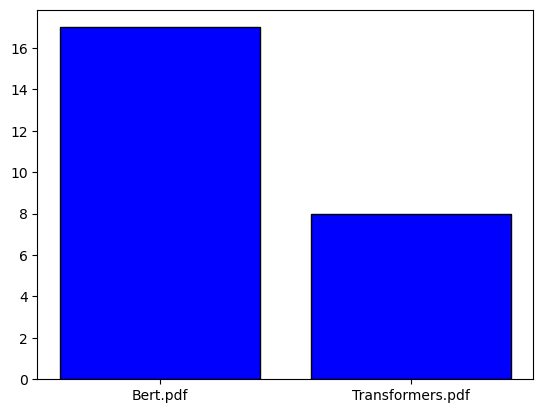

['Bert.pdf', 'Transformers.pdf']
[1, 1]


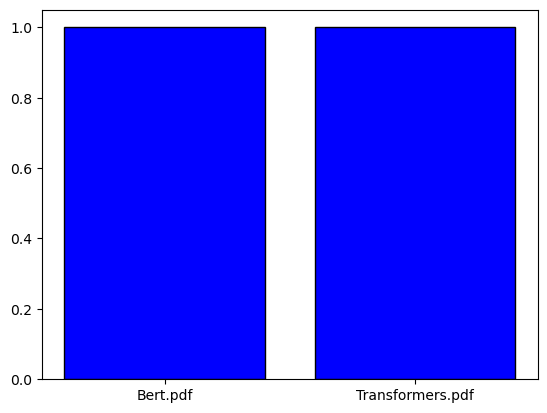

In [8]:
count.show_plots()